#### converting the DMS lat lon to decimals and correction of some incorrect waypoints.
#### final saved file is : airway_data_decimal.csv
### aircraft_data  is also converted to decimal

In [1]:
import pandas as pd
import re


In [2]:
def dms_to_decimal(coord_str):
    """
    Convert coordinates from DMS (Degrees Minutes Seconds) format to decimal degrees.
    Input format example: '032432.00N' or '1035544.00E'
    
    Parameters:
    coord_str (str): Coordinate string in DMS format
    
    Returns:
    float: Decimal degrees
    """
    if pd.isna(coord_str):
        return None
    
    # Extract numeric values and hemisphere
    match = re.match(r'(\d{2,3})(\d{2})(\d{2}\.\d+)([NSEW])', coord_str)
    if not match:
        return None
    
    degrees = float(match.group(1))
    minutes = float(match.group(2))
    seconds = float(match.group(3))
    hemisphere = match.group(4)
    
    # Convert to decimal degrees
    decimal = degrees + minutes/60 + seconds/3600
    
    # Adjust sign based on hemisphere
    if hemisphere in ['S', 'W']:
        decimal = -decimal
        
    return decimal

def convert_coordinates(df):
    """
    Convert all latitude and longitude columns in the dataframe to decimal format.
    
    Parameters:
    df (pandas.DataFrame): Input dataframe with coordinate columns
    
    Returns:
    pandas.DataFrame: DataFrame with converted coordinates
    """
    # Create a copy of the dataframe
    df_decimal = df.copy()
    
    # Get all column names
    columns = df.columns
    
    df_decimal['Initial_Lat_Dec'] = df['Initial Latitude'].apply(dms_to_decimal)
    df_decimal['Initial_Lon_Dec'] = df['Initial Longitude'].apply(dms_to_decimal)
    # Convert all latitude and longitude columns
    for col in columns:
        if 'Latitude' in col:
            new_col = f'{col} (Decimal)'
            df_decimal[new_col] = df[col].apply(dms_to_decimal)
        elif 'Longitude' in col:
            new_col = f'{col} (Decimal)'
            df_decimal[new_col] = df[col].apply(dms_to_decimal)
            
    
    return df_decimal

In [3]:

# Read the CSV file
df = pd.read_csv('airways_data_23jan.csv')

# Convert coordinates
df_converted = convert_coordinates(df)
df_converted.columns
# Save the results
# df_converted.to_csv('airways_data_decimal.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'airways_data_23jan.csv'

In [20]:
df_converted.head() 
columns_to_drop = (
        ['Initial Latitude', 'Initial Longitude'] +
        [f'Waypoint {i} Latitude' for i in range(1, 12)] +
        [f'Waypoint {i} Longitude' for i in range(1, 12)]
    )
df_converted = df_converted.drop([col for col in columns_to_drop if col in df_converted.columns], axis=1)
df_converted 
df_converted.columns

Index(['Sector', 'Airway', 'Departure Airport', 'Initial Heading', 'Air Route',
       'Destination Airport', 'Waypoint 1', 'Waypoint 2', 'Waypoint 3',
       'Waypoint 4', 'Waypoint 5', 'Waypoint 6', 'Waypoint 7', 'Waypoint 8',
       'Waypoint 9', 'Waypoint 10', 'Waypoint 11', 'Initial_Lat_Dec',
       'Initial_Lon_Dec', 'Initial Latitude (Decimal)',
       'Initial Longitude (Decimal)', 'Waypoint 1 Latitude (Decimal)',
       'Waypoint 1 Longitude (Decimal)', 'Waypoint 2 Latitude (Decimal)',
       'Waypoint 2 Longitude (Decimal)', 'Waypoint 3 Latitude (Decimal)',
       'Waypoint 3 Longitude (Decimal)', 'Waypoint 4 Latitude (Decimal)',
       'Waypoint 4 Longitude (Decimal)', 'Waypoint 5 Latitude (Decimal)',
       'Waypoint 5 Longitude (Decimal)', 'Waypoint 6 Latitude (Decimal)',
       'Waypoint 6 Longitude (Decimal)', 'Waypoint 7 Latitude (Decimal)',
       'Waypoint 7 Longitude (Decimal)', 'Waypoint 8 Latitude (Decimal)',
       'Waypoint 8 Longitude (Decimal)', 'Waypoint 9 Lat

In [21]:
i = 10
print(df_converted.loc[i]['Airway'])
print(df_converted.loc[i]['Air Route'])
print(df_converted.loc[i]['Waypoint 6 Longitude (Decimal)'])
print(df_converted.loc[i]['Waypoint 6 Latitude (Decimal)'])



N875
['DAMOG', 'SUSAR', 'MUMSO', 'ELGOR', 'LEBIN', 'OMLIV', 'BOBOB']
106.69638888888889
1.7155555555555555


In [22]:
df_converted.loc[2, 'Waypoint 4 Longitude (Decimal)'] = 106.40
df_converted.loc[2, 'Waypoint 4 Latitude (Decimal)'] = 2.558

df_converted.loc[2, 'Waypoint 6 Longitude (Decimal)'] = 105.19
df_converted.loc[2, 'Waypoint 6 Latitude (Decimal)'] = 2.89

df_converted.loc[9, 'Waypoint 4 Longitude (Decimal)'] = 106.10
df_converted.loc[9, 'Waypoint 4 Latitude (Decimal)'] = 3.24


df_converted.loc[9, 'Waypoint 5 Longitude (Decimal)'] = 106.388
df_converted.loc[9, 'Waypoint 5 Latitude (Decimal)'] = 3.35

df_converted.loc[9, 'Waypoint 2 Longitude (Decimal)'] = 104.65
df_converted.loc[9, 'Waypoint 2 Latitude (Decimal)'] = 2.69

df_converted.loc[9, 'Waypoint 3 Longitude (Decimal)'] = 105.19
df_converted.loc[9, 'Waypoint 3 Latitude (Decimal)'] = 2.89

df_converted.loc[3, 'Waypoint 6 Longitude (Decimal)'] = 105.19
df_converted.loc[3, 'Waypoint 6 Latitude (Decimal)'] = 2.89

df_converted.loc[3, 'Waypoint 8 Longitude (Decimal)'] = 106.40
df_converted.loc[3, 'Waypoint 8 Latitude (Decimal)'] = 2.558

df_converted.loc[3, 'Waypoint 8 Longitude (Decimal)'] = 106.40
df_converted.loc[3, 'Waypoint 8 Latitude (Decimal)'] = 2.558

df_converted.loc[8, 'Waypoint 5 Longitude (Decimal)'] = 104.468
df_converted.loc[8, 'Waypoint 5 Latitude (Decimal)'] = 2.87

df_converted.loc[8, 'Waypoint 6 Longitude (Decimal)'] = 104.105
df_converted.loc[8, 'Waypoint 6 Latitude (Decimal)'] = 2.57

df_converted.loc[10, 'Waypoint 5 Longitude (Decimal)'] = 106.101
df_converted.loc[10, 'Waypoint 5 Latitude (Decimal)'] = 3.24

df_converted.loc[10, 'Waypoint 6 Longitude (Decimal)'] = 106.47
df_converted.loc[10, 'Waypoint 6 Latitude (Decimal)'] = 2.92

print(df_converted.loc[2]['Waypoint 4 Longitude (Decimal)'])

106.4


In [29]:
df_converted.to_csv('airways_data_decimal.csv', index=False)

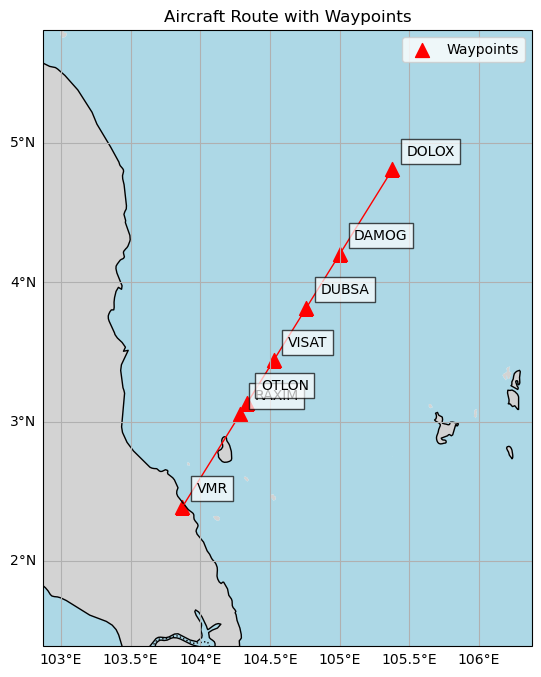

In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# Extract waypoint data
row = df_converted.iloc[4]
lats = []
lons = []
names = []

# Collect non-NaN waypoints
for i in range(1, 12):  # Waypoints 1-7
    lat = row[f'Waypoint {i} Latitude (Decimal)']
    lon = row[f'Waypoint {i} Longitude (Decimal)']
    if pd.notna(lat) and pd.notna(lon):
        lats.append(float(lat))
        lons.append(float(lon))
        names.append(row[f'Waypoint {i}'])

# Create map
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Set bounds
margin = 1
ax.set_extent([
    min(lons) - margin,
    max(lons) + margin,
    min(lats) - margin,
    max(lats) + margin
])

# Plot waypoints and route
ax.plot(lons, lats, 'r-', transform=ccrs.PlateCarree(), linewidth=1)
ax.scatter(lons, lats, c='red', marker='^', s=100, transform=ccrs.PlateCarree(), label='Waypoints')

# Add labels
for name, lon, lat in zip(names, lons, lats):
    ax.text(lon + 0.1, lat + 0.1, name, transform=ccrs.PlateCarree(),
            bbox=dict(facecolor='white', alpha=0.7))

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

plt.title('Aircraft Route with Waypoints')
plt.legend()
plt.show()

In [22]:
aircraft_data = pd.read_csv('aircraft_data_24jan.csv')
aircraft_data

,Unnamed: 0,Callsign,Start Time,Aircraft Type,Air Routes,Initial Latitude,Initial Longitude,Initial Altitude (FL),Requested FL
0,0,SQ10,0,B738,"VMR, LENDA, LIPRO, LEBIN, ONAPO, LUSMO",022318.00N,1035218.00E,400.0,350.0
1,1,SQ11,150,B738,"VMR, LENDA, LIPRO, LEBIN, ONAPO, LUSMO",022318.00N,1035218.00E,390.0,350.0
2,2,SQ12,300,B738,"VMR, LENDA, LIPRO, LEBIN, ONAPO, LUSMO",022318.00N,1035218.00E,380.0,350.0
3,3,SQ13,100,A320,"IDSEL, URIGO, VISAT, MABAL, ELGOR, OPULA, LUSMO",032432.00N,1035544.00E,370.0,350.0
4,4,SQ14,350,A320,"IDSEL, URIGO, VISAT, MABAL, ELGOR, OPULA, LUSMO",032432.00N,1035544.00E,360.0,350.0
5,5,SQ15,600,A320,"IDSEL, URIGO, VISAT, MABAL, ELGOR, OPULA, LUSMO",032432.00N,1035544.00E,350.0,350.0
6,6,SQ16,0,B738,"SABIP, BOBOB, OMBAP, VERIN, BUNTO, LIPRO, KILO...",020940.00N,1075044.00E,380.0,350.0
7,7,SQ17,150,B738,"SABIP, BOBOB, OMBAP, VERIN, BUNTO, LIPRO, KILO...",020940.00N,1075044.00E,370.0,350.0
8,8,SQ18,350,B738,"SABIP, BOBOB, OMBAP, VERIN, BUNTO, LIPRO, KILO...",020940.00N,1075044.00E,360.0,350.0
9,9,SQ19,550,B738,"SABIP, BOBOB, OMBAP, VERIN, BUNTO, LIPRO, KILO...",020940.00N,1075044.00E,350.0,350.0


In [23]:
aircraft_data_decimal = convert_coordinates(aircraft_data)
aircraft_data_decimal.head()

,Unnamed: 0,Callsign,Start Time,Aircraft Type,Air Routes,Initial Latitude,Initial Longitude,Initial Altitude (FL),Requested FL,Initial_Lat_Dec,Initial_Lon_Dec,Initial Latitude (Decimal),Initial Longitude (Decimal)
0,0,SQ10,0,B738,"VMR, LENDA, LIPRO, LEBIN, ONAPO, LUSMO",022318.00N,1035218.00E,400.0,350.0,2.388333,103.871667,2.388333,103.871667
1,1,SQ11,150,B738,"VMR, LENDA, LIPRO, LEBIN, ONAPO, LUSMO",022318.00N,1035218.00E,390.0,350.0,2.388333,103.871667,2.388333,103.871667
2,2,SQ12,300,B738,"VMR, LENDA, LIPRO, LEBIN, ONAPO, LUSMO",022318.00N,1035218.00E,380.0,350.0,2.388333,103.871667,2.388333,103.871667
3,3,SQ13,100,A320,"IDSEL, URIGO, VISAT, MABAL, ELGOR, OPULA, LUSMO",032432.00N,1035544.00E,370.0,350.0,3.408889,103.928889,3.408889,103.928889
4,4,SQ14,350,A320,"IDSEL, URIGO, VISAT, MABAL, ELGOR, OPULA, LUSMO",032432.00N,1035544.00E,360.0,350.0,3.408889,103.928889,3.408889,103.928889


In [24]:
aircraft_data_decimal = aircraft_data_decimal.drop(['Initial Latitude', 'Initial Longitude', 'Initial_Lat_Dec', 'Initial_Lon_Dec',], axis=1)

In [25]:
aircraft_data_decimal.columns

Index(['Unnamed: 0', 'Callsign', 'Start Time', 'Aircraft Type', 'Air Routes',
       'Initial Altitude (FL)', 'Requested FL', 'Initial Latitude (Decimal)',
       'Initial Longitude (Decimal)'],
      dtype='object')

In [26]:
aircraft_data_decimal.to_csv('aircraft_data_decimal_24jan.csv', index=False)